# Finetuning on REAL data

# 1. Load dataloaders 

In [1]:
from data.dataloader import create_dataloaders

train_dataloader, val_dataloader = create_dataloaders(
    csv_path= "../../project_datasets/audio/tubular/parkinsons_real.csv",
    batch_size= 32,
    train_val_split= 0.5,
)

Train dataset size:      97
Validation dataset size: 98
-----------------------------------------
Train dataloader steps:  3
Val dataloader steps:    4


# 2. Load models

- ResNet18: 11.7M
- DenseNet121: 8M
- EfficientNet-B0: 5M
- MobileNet_V2: 2.5M
- MobileNet_V3: 5.5M

In [ ]:
from Models import (
    model_densenet121,
    model_efficientnetB0,
    model_mobilenetV2,
    model_mobilenetV3,
    model_resnet18
)

models = [
    model_densenet121.DenseNet1D(),
    model_efficientnetB0.EfficientNet1D(),
    model_mobilenetV2.MobileNet1D_V2(),
    model_mobilenetV3.MobileNet1D_V3(),
    model_resnet18.ResNet1D()
]

model_names = [
    "DenseNet121",
    "EfficientNetB0",
    "MobileNetV2",
    "MobileNetV3-Large",
    "ResNet18",
]

# 3. Train models

In [ ]:
from training.trainer import train

for model, model_name in zip(models, model_names):
    train(
        model= model,
        train_dataloader= train_dataloader,
        val_dataloader= val_dataloader,
        
        model_name= model_name + "_finetuned",
        run_name= model_name + "_finetuned",
        
        load_pretrained= model_name + "_BEST.pth",
        
        epochs= 50,
        max_lr = 1e-4,
    )

In [1]:
!tensorboard --logdir=runs

^C


# 4. Plot confusion matrix (of the best model)

In [2]:
import torch
from Models.model_efficientnetB0 import EfficientNet1D

model = EfficientNet1D()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
load_pretrained = "checkpoints/EfficientNetB0_finetuned_BEST.pth"

# load checkpoint
checkpoint = torch.load(load_pretrained, map_location=device)
# load model
model.load_state_dict(checkpoint['model_state_dict'])

print(f"Loaded pretrained model:")
print(f"- val_loss={checkpoint['val_loss']:.4f}")
print(f"- val_acc={checkpoint['val_acc']:.4f}")
print(f"- val_recall={checkpoint['val_recall']:.4f}")
print(f"- val_precision={checkpoint['val_precision']:.4f}")
print(f"- val_f1={checkpoint['val_f1']:.4f}")

Loaded pretrained model:
- val_loss=0.0032
- val_acc=1.0000
- val_recall=1.0000
- val_precision=1.0000
- val_f1=1.0000


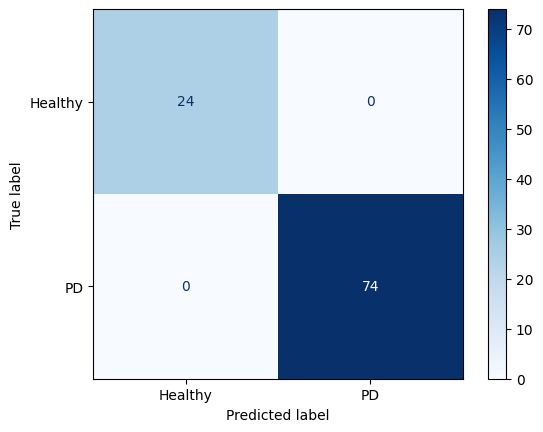

In [3]:
from training.confusion_mat import plot_confusion_matrix

plot_confusion_matrix(
    model=model,
    dataloader=val_dataloader,
    device=device,
    class_names=["Healthy", "PD"],
    # threshold=0.4,
)